In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_columns', 500)

# for plotting
from itertools import cycle

plt.style.use('ggplot')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

## Load in the Dataset and Parse Tweet Text

In [2]:
tweets = pd.read_csv('../DataSets/tweets.csv')
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text
0,210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
1,210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩
2,210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩
3,210,1482553436910628866,2022-01-16 03:20:58+00:00,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩
4,210,1482553445726908420,2022-01-16 03:21:00+00:00,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩


In [3]:
tweets.shape

(1000354, 5)

In [4]:
print(tweets['tweet_text'][0])

Wordle 210 4/6

⬛⬛🟨🟨⬛
🟩⬛⬛⬛⬛
🟩🟩🟨⬛⬛
🟩🟩🟩🟩🟩


In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000354 entries, 0 to 1000353
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   wordle_id       1000354 non-null  int64 
 1   tweet_id        1000354 non-null  int64 
 2   tweet_date      1000354 non-null  object
 3   tweet_username  1000354 non-null  object
 4   tweet_text      1000354 non-null  object
dtypes: int64(2), object(3)
memory usage: 38.2+ MB


In [6]:
tweets['tweet_date']

0          2022-01-16 03:20:43+00:00
1          2022-01-16 03:20:46+00:00
2          2022-01-16 03:20:55+00:00
3          2022-01-16 03:20:58+00:00
4          2022-01-16 03:21:00+00:00
                     ...            
1000349    2022-09-26 01:01:43+00:00
1000350    2022-09-26 01:02:13+00:00
1000351    2022-09-26 01:03:11+00:00
1000352    2022-09-26 01:03:11+00:00
1000353    2022-09-26 01:03:35+00:00
Name: tweet_date, Length: 1000354, dtype: object

In [7]:
tweets['tweet_datetime'] = pd.to_datetime(tweets['tweet_date'])
tweets['tweet_date'] = tweets['tweet_datetime'].dt.date

In [8]:
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime
0,210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00
1,210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00
2,210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:55+00:00
3,210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:58+00:00
4,210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:21:00+00:00


In [9]:
tweets['wordle_id'] = tweets['tweet_text'].str[:10]

In [10]:
tweets['n_attempts'] = tweets['tweet_text'].str[11].astype('int')

In [11]:
tweets['id'] = tweets['tweet_text'].str[7:10]

In [12]:
def process_tweets(tweets):
    tweets['tweet_datetime'] = pd.to_datetime(tweets['tweet_date'])
    tweets['tweet_date'] = tweets['tweet_datetime'].dt.date
    tweets['wordle_id'] = tweets['tweet_text'].str[:10]
    tweets['n_attempts'] = tweets['tweet_text'].str[11].astype('int')
    tweets['id'] = tweets['tweet_text'].str[7:10]
    
    return tweets

tweets = process_tweets(tweets)

In [13]:
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,n_attempts,id
0,Wordle 210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16,4,210
1,Wordle 210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16,4,210
2,Wordle 210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,2022-01-16,4,210
3,Wordle 210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16,3,210
4,Wordle 210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16,3,210


### How many tweets do we have for each date

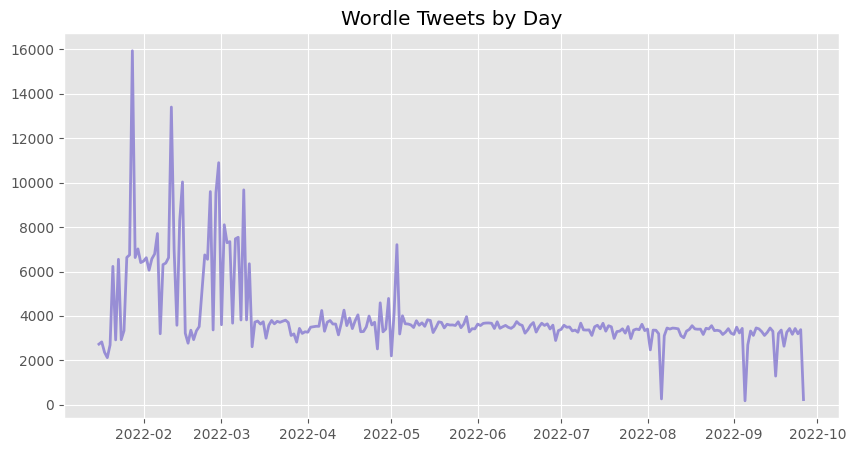

In [14]:
tweets['tweet_date'].value_counts() \
    .plot(figsize = (10, 5), title = 'Wordle Tweets by Day',
         color = color_pal[2], lw = 2)

plt.show()

### Number of Attempts Analysis

In [15]:
tweets.groupby('wordle_id')['n_attempts'].value_counts() \
    .unstack() \
    .style.background_gradient(axis = 1)

n_attempts,2,3,4,5,6
wordle_id,,,,,
Wordle 210,222,897,1064,489,165
Wordle 211,196,903,1016,564,215
Wordle 212,191,787,820,413,188
Wordle 213,51,260,630,697,481
Wordle 214,383,1012,823,363,122
Wordle 215,246,877,1017,579,224
Wordle 216,461,1952,2078,1199,415
Wordle 217,102,566,1031,843,418
Wordle 218,170,1009,1384,730,187


### How many attempts does it usually take to solve?

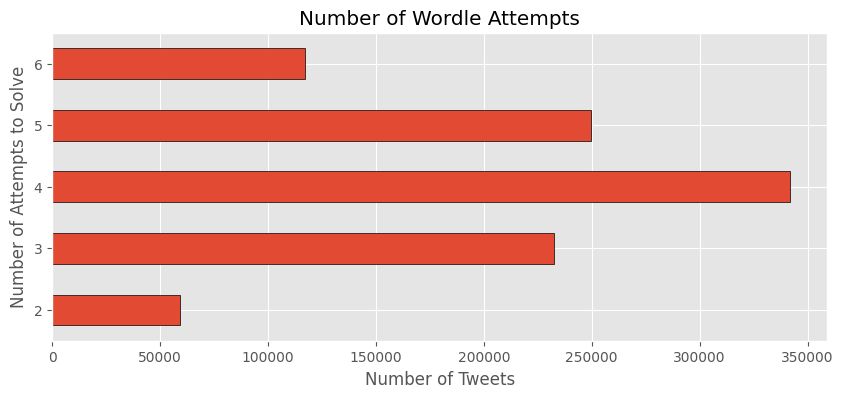

In [16]:
ax = tweets['n_attempts'].value_counts() \
    .sort_index() \
    .plot(figsize = (10, 4),
          kind = 'barh',
          title = 'Number of Wordle Attempts',
          edgecolor = 'black')

ax.set_xlabel('Number of Tweets')
ax.set_ylabel('Number of Attempts to Solve')

plt.show()

## Parse Tweet Texts

In [17]:
# make dark squares consistent
tweets['tweet_text'] = tweets['tweet_text'].str.replace('⬛', '⬜')

In [18]:
def parse_tweet_text(tweets):
    for n in range(6):
        n += 1
        tweets[f'has_guess{n}'] = tweets['tweet_text'].str.split('\n').str[n + 1] \
            .str.contains('|'.join(['🟨', '⬜', '🟩'])) \
            .fillna(False)

        # parse out the tweet text
        tweets.loc[tweets[f'has_guess{n}'], f'guess{n}'] = \
            tweets['tweet_text'].str.split('\n').str[n + 1].str[:5]

        # count number correct, misplaced, and incorrect
        tweets.loc[tweets[f'has_guess{n}'], f'guess{n}_incorrect'] = \
            tweets[f'guess{n}'].str.count('⬜')
        tweets.loc[tweets[f'has_guess{n}'], f'guess{n}_misplaced'] = \
            tweets[f'guess{n}'].str.count('🟨')
        tweets.loc[tweets[f'has_guess{n}'], f'guess{n}_correct'] = \
            tweets[f'guess{n}'].str.count('🟩')

        tweets.loc[tweets[f'guess{n}_correct'] == 6, 'final_guess'] = n
    
    return tweets

tweets = parse_tweet_text(tweets)

In [19]:
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,n_attempts,id,has_guess1,guess1,guess1_incorrect,guess1_misplaced,guess1_correct,final_guess,has_guess2,guess2,guess2_incorrect,guess2_misplaced,guess2_correct,has_guess3,guess3,guess3_incorrect,guess3_misplaced,guess3_correct,has_guess4,guess4,guess4_incorrect,guess4_misplaced,guess4_correct,has_guess5,guess5,guess5_incorrect,guess5_misplaced,guess5_correct,has_guess6,guess6,guess6_incorrect,guess6_misplaced,guess6_correct
0,Wordle 210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬜⬜🟨🟨⬜\n🟩⬜⬜⬜⬜\n🟩🟩🟨⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16,4,210,True,⬜⬜🟨🟨⬜,3,2,0,NaN,True,🟩⬜⬜⬜⬜,4.0,0.0,1.0,True,🟩🟩🟨⬜⬜,2.0,1.0,2.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
1,Wordle 210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16,4,210,True,⬜⬜⬜⬜⬜,5,0,0,NaN,True,🟩🟩🟨🟨⬜,1.0,2.0,2.0,True,🟩🟩⬜🟩🟨,1.0,1.0,3.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
2,Wordle 210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,2022-01-16,4,210,True,⬜⬜⬜🟨⬜,4,1,0,NaN,True,⬜🟩⬜🟨⬜,3.0,1.0,1.0,True,⬜🟩⬜🟨⬜,3.0,1.0,1.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
3,Wordle 210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16,3,210,True,⬜⬜🟨⬜⬜,4,1,0,NaN,True,🟨🟨⬜⬜⬜,3.0,2.0,0.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
4,Wordle 210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟩🟩🟩⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16,3,210,True,⬜⬜🟨⬜⬜,4,1,0,NaN,True,🟩🟩🟩⬜⬜,2.0,0.0,3.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN


In [20]:
# keep additional tweet text
tweets['additional_text'] = \
    tweets.loc[~tweets['tweet_text'] \
               .str.split('\n').str[-1].str.contains('🟩')] \
               ['tweet_text'].str.split('\n').str[-1]

In [21]:
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,n_attempts,id,has_guess1,guess1,guess1_incorrect,guess1_misplaced,guess1_correct,final_guess,has_guess2,guess2,guess2_incorrect,guess2_misplaced,guess2_correct,has_guess3,guess3,guess3_incorrect,guess3_misplaced,guess3_correct,has_guess4,guess4,guess4_incorrect,guess4_misplaced,guess4_correct,has_guess5,guess5,guess5_incorrect,guess5_misplaced,guess5_correct,has_guess6,guess6,guess6_incorrect,guess6_misplaced,guess6_correct,additional_text
0,Wordle 210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬜⬜🟨🟨⬜\n🟩⬜⬜⬜⬜\n🟩🟩🟨⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16,4,210,True,⬜⬜🟨🟨⬜,3,2,0,NaN,True,🟩⬜⬜⬜⬜,4.0,0.0,1.0,True,🟩🟩🟨⬜⬜,2.0,1.0,2.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
1,Wordle 210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16,4,210,True,⬜⬜⬜⬜⬜,5,0,0,NaN,True,🟩🟩🟨🟨⬜,1.0,2.0,2.0,True,🟩🟩⬜🟩🟨,1.0,1.0,3.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2,Wordle 210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,2022-01-16,4,210,True,⬜⬜⬜🟨⬜,4,1,0,NaN,True,⬜🟩⬜🟨⬜,3.0,1.0,1.0,True,⬜🟩⬜🟨⬜,3.0,1.0,1.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
3,Wordle 210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16,3,210,True,⬜⬜🟨⬜⬜,4,1,0,NaN,True,🟨🟨⬜⬜⬜,3.0,2.0,0.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
4,Wordle 210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟩🟩🟩⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16,3,210,True,⬜⬜🟨⬜⬜,4,1,0,NaN,True,🟩🟩🟩⬜⬜,2.0,0.0,3.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


## Plot Results by Attemts

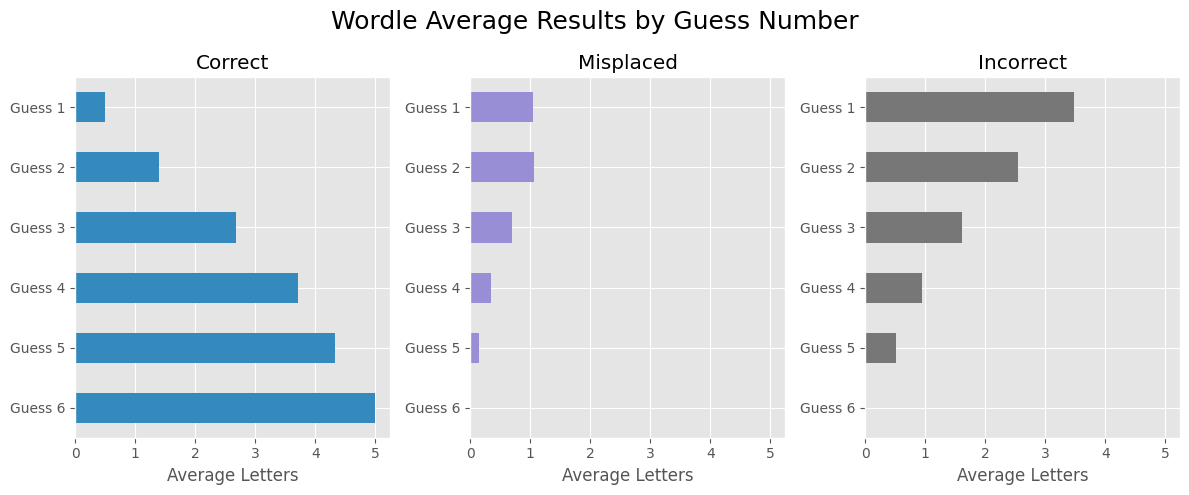

In [22]:
fig, axs = plt.subplots(1, 3, figsize = (12, 5), sharex = True)

for i, x in enumerate(['_correct', '_misplaced', '_incorrect']):
    col_subset = [c for c in tweets.columns if x in c]
    guess_avg = tweets[col_subset].mean()
    guess_avg.index = [f'Guess {i + 1}' for i in range(6)]
    guess_avg.sort_index(ascending = False) \
        .plot(kind = 'barh',
              title = f'{x.strip("_").replace("_", " ").title()}',
              ax = axs[i],
              color = color_pal[i + 1])
    axs[i].set_xlabel('Average Letters')
    
fig.suptitle('Wordle Average Results by Guess Number', fontsize = 18)
plt.tight_layout()
plt.show()

In [23]:
tweets.head(2)

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,n_attempts,id,has_guess1,guess1,guess1_incorrect,guess1_misplaced,guess1_correct,final_guess,has_guess2,guess2,guess2_incorrect,guess2_misplaced,guess2_correct,has_guess3,guess3,guess3_incorrect,guess3_misplaced,guess3_correct,has_guess4,guess4,guess4_incorrect,guess4_misplaced,guess4_correct,has_guess5,guess5,guess5_incorrect,guess5_misplaced,guess5_correct,has_guess6,guess6,guess6_incorrect,guess6_misplaced,guess6_correct,additional_text
0,Wordle 210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬜⬜🟨🟨⬜\n🟩⬜⬜⬜⬜\n🟩🟩🟨⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16,4,210,True,⬜⬜🟨🟨⬜,3,2,0,NaN,True,🟩⬜⬜⬜⬜,4.0,0.0,1.0,True,🟩🟩🟨⬜⬜,2.0,1.0,2.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
1,Wordle 210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16,4,210,True,⬜⬜⬜⬜⬜,5,0,0,NaN,True,🟩🟩🟨🟨⬜,1.0,2.0,2.0,True,🟩🟩⬜🟩🟨,1.0,1.0,3.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


In [24]:
tweets.tail(2)

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,n_attempts,id,has_guess1,guess1,guess1_incorrect,guess1_misplaced,guess1_correct,final_guess,has_guess2,guess2,guess2_incorrect,guess2_misplaced,guess2_correct,has_guess3,guess3,guess3_incorrect,guess3_misplaced,guess3_correct,has_guess4,guess4,guess4_incorrect,guess4_misplaced,guess4_correct,has_guess5,guess5,guess5_incorrect,guess5_misplaced,guess5_correct,has_guess6,guess6,guess6_incorrect,guess6_misplaced,guess6_correct,additional_text
1000352,Wordle 463,1574202894546608129,2022-09-26,nick_cusumano,Wordle 463 4/6\n\n⬜⬜🟨⬜🟩\n⬜⬜⬜🟨🟩\n⬜🟨🟨⬜🟩\n🟩🟩🟩🟩🟩,2022-09-26,4,463,True,⬜⬜🟨⬜🟩,3,1,1,NaN,True,⬜⬜⬜🟨🟩,3.0,1.0,1.0,True,⬜🟨🟨⬜🟩,2.0,2.0,1.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
1000353,Wordle 463,1574202991049162757,2022-09-26,yansterLG,Wordle 463 5/6\n\n⬜🟨🟨⬜⬜\n⬜⬜🟨⬜🟩\n🟩⬜⬜⬜🟩\n🟩⬜⬜🟩🟩\n...,2022-09-26,5,463,True,⬜🟨🟨⬜⬜,3,2,0,NaN,True,⬜⬜🟨⬜🟩,3.0,1.0,1.0,True,🟩⬜⬜⬜🟩,3.0,0.0,2.0,True,🟩⬜⬜🟩🟩,2.0,0.0,3.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,NaN


In [25]:
tweets[tweets['id'] == tweets['id'].max()]['tweet_date'].min()

datetime.date(2022, 9, 25)

In [26]:
words = {
    210: 'PANIC',
    211: 'SOLAR',
    212: 'SHIRE',
    213: 'PROXY',
    214: 'POINT',
    215: 'ROBOT',
    216: 'PRICK',
    217: 'WINCE',
    218: 'CRIMP',
    219: 'KNOLL',
    220: 'SUGAR',
    221: 'WHACK',
    222: 'MOUNT',
    223: 'PERKY',
    224: 'COULD',
    225: 'WRUNG',
    226: 'LIGHT',
    227: 'THOSE',
    228: 'MOIST',
    229: 'SHARD',
    230: 'PLEAT',
    231: 'ALOFT',
    232: 'SKILL',
    233: 'ELDER',
    234: 'FRAME',
    235: 'HUMOR',
    236: 'PAUSE',
    237: 'ULCER',
    238: 'ULTRA',
    239: 'ROBIN',
    240: 'CYNIC',
    241: 'AGORA',
    242: 'AROMA',
    243: 'CAULK',
    244: 'SHAKE',
    245: 'PUPAL',
    246: 'DODGE',
    247: 'SWILL',
    248: 'TACIT',
    249: 'OTHER',
    250: 'THORN',
    251: 'TROVE',
    252: 'BLOKE',
    253: 'VIVID',
    254: 'SPILL',
    255: 'CHANT',
    256: 'CHOKE',
    257: 'RUPEE',
    258: 'NASTY',
    259: 'MOURN',
    260: 'AHEAD',
    261: 'BRINE',
    262: 'CLOTH',
    263: 'HOARD',
    264: 'SWEET',
    265: 'MONTH',
    266: 'LAPSE',
    267: 'WATCH',
    268: 'TODAY',
    269: 'FOCUS',
    270: 'SMELT',
    271: 'TEASE',
    272: 'CATER',
    273: 'MOVIE',
    274: 'LYNCH',
    275: 'SAUTE',
    276: 'ALLOW',
    277: 'RENEW',
    278: 'THEIR',
    279: 'SLOSH',
    280: 'PURGE',
    281: 'CHEST',
    282: 'DEPOT',
    283: 'EPOXY',
    284: 'NYMPH',
    285: 'FOUND',
    286: 'SHALL',
    287: 'HARRY',
    288: 'STOVE',
    289: 'LOWLY',
    290: 'SNOUT',
    291: 'TROPE',
    292: 'FEWER',
    293: 'SHAWL',
    294: 'NATAL',
    295: 'FIBRE',
    296: 'COMMA',
    297: 'FORAY',
    298: 'SCARE',
    299: 'STAIR',
    300: 'BLACK',
    301: 'SQUAD',
    302: 'ROYAL',
    303: 'CHUNK',
    304: 'MINCE',
    305: 'SLAVE',
    306: 'SHAME',
    307: 'CHEEK',
    308: 'AMPLE',
    309: 'FLAIR',
    310: 'FOYER',
    311: 'CARGO',
    312: 'OXIDE',
    313: 'PLANT',
    314: 'OLIVE',
    315: 'INERT',
    316: 'ASKEW',
    317: 'HEIST',
    318: 'SHOWN',
    319: 'ZESTY',
    320: 'HASTY',
    321: 'TRASH',
    322: 'FELLA',
    323: 'LARVA',
    324: 'FORGO',
    325: 'STORY',
    326: 'HAIRY',
    327: 'TRAIN',
    328: 'HOMER',
    329: 'BADGE',
    330: 'MIDST',
    331: 'CANNY',
    332: 'FETUS',
    333: 'BUTCH',
    334: 'FARCE',
    335: 'SLUNG',
    336: 'TIPSY',
    337: 'METAL',
    338: 'YIELD',
    339: 'DELVE',
    340: 'BEING',
    341: 'SCOUR',
    342: 'GLASS',
    343: 'GAMER',
    344: 'SCRAP',
    345: 'MONEY',
    346: 'HINGE',
    347: 'ALBUM',
    348: 'VOUCH',
    349: 'ASSET',
    350: 'TIARA',
    351: 'CREPT',
    352: 'BAYOU',
    353: 'ATOLL',
    354: 'MANOR',
    355: 'CREAK',
    356: 'SHOWY',
    357: 'PHASE',
    358: 'FROTH',
    359: 'DEPTH',
    360: 'GLOOM',
    361: 'FLOOD',
    362: 'TRAIT',
    363: 'GIRTH',
    364: 'PIETY',
    365: 'PAYER',
    366: 'GOOSE',
    367: 'FLOAT',
    368: 'DONOR',
    369: 'ATONE',
    370: 'PRIMO',
    371: 'APRON',
    372: 'BLOWN',
    373: 'CACAO',
    374: 'LOSER',
    375: 'INPUT',
    376: 'GLOAT',
    377: 'AWFUL',
    378: 'BRINK',
    379: 'SMITE',
    380: 'BEADY',
    381: 'RUSTY',
    382: 'RETRO',
    383: 'DROLL',
    384: 'GAWKY',
    385: 'HUTCH',
    386: 'PINTO',
    387: 'GAILY',
    388: 'EGRET',
    389: 'LILAC',
    390: 'SEVER',
    391: 'FIELD',
    392: 'FLUFF',
    393: 'HYDRO',
    394: 'FLACK',
    395: 'AGAPE',
    396: 'WENCH',
    397: 'VOICE',
    398: 'STEAD',
    399: 'STALK',
    400: 'BERTH',
    401: 'MADAM',
    402: 'NIGHT',
    403: 'BLAND',
    404: 'LIVER',
    405: 'WEDGE',
    406: 'AUGUR',
    407: 'ROOMY',
    408: 'WACKY',
    409: 'FLOCK',
    410: 'ANGRY',
    411: 'BOBBY',
    412: 'TRITE',
    413: 'APHID',
    414: 'TRYST',
    415: 'MIDGE',
    416: 'POWER',
    417: 'ELOPE',
    418: 'CINCH',
    419: 'MOTTO',
    420: 'STOMP',
    421: 'UPSET',
    422: 'BLUFF',
    423: 'CRAMP',
    424: 'QUART',
    425: 'COYLY',
    426: 'YOUTH',
    427: 'RHYME',
    428: 'BUGGY',
    429: 'ALIEN',
    430: 'SMEAR',
    431: 'UNFIT',
    432: 'PATTY',
    433: 'CLING',
    434: 'GLEAN',
    435: 'LABEL',
    436: 'HUNKY',
    437: 'KHAKI',
    438: 'POKER',
    439: 'GRUEL',
    440: 'TWICE',
    441: 'TWANG',
    442: 'SHRUG',
    443: 'TREAT',
    444: 'UNLIT',
    445: 'WASTE',
    446: 'MERIT',
    447: 'WOVEN',
    448: 'OCTAL',
    449: 'NEEDY',
    450: 'CLOWN',
    451: 'WIDOW',
    452: 'IRONY',
    453: 'RUDER',
    454: 'GAUZE',
    455: 'CHIEF',
    456: 'ONSET',
    457: 'PRIZE',
    458: 'FUNGI',
    459: 'CHARM',
    460: 'GULLY',
    461: 'INTER',
    462: 'WHOOP',
    463: 'TAUNT'
}

In [27]:
tweets['answer'] = tweets['id'].astype('int64').map(words)

In [28]:
first_guess_correct = []

for i, d in tweets[:200000].dropna(subset = ['answer']).iterrows():
    example_text = d['guess1']
    example_solution = d['answer']
    
    results = [x.span()[0] for x in re.finditer('🟩', example_text)]
    first_guess_letter = [example_solution[i] for i in results]
    
    first_guess_correct += first_guess_letter

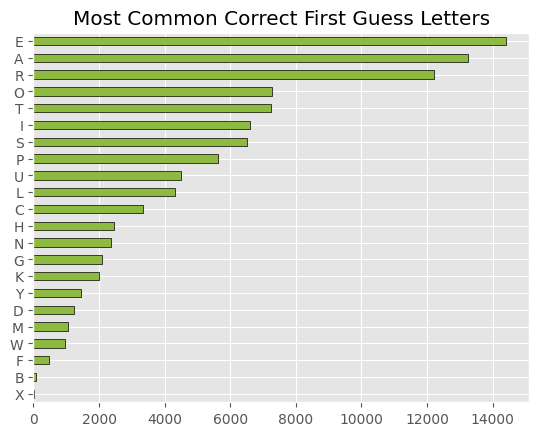

In [29]:
pd.Series(first_guess_correct).value_counts(ascending = True) \
    .plot(kind = 'barh',
          title = 'Most Common Correct First Guess Letters',
          edgecolor = 'black', color = color_pal[5])

plt.show()